In [4]:
import numpy as np 
import matplotlib.pylab as plt
%matplotlib inline
from rubin_scheduler.site_models import (
    ScheduledDowntimeData,
    UnscheduledDowntimeData,
    SeeingData,
    SeeingModel,
    CloudData,
    Almanac,
)

from rubin_scheduler.utils import (
    SURVEY_START_MJD,
)
from astropy.time import Time


In [5]:

mjd_start_time = Time(SURVEY_START_MJD, format="mjd")
# Downtime
down_nights = []
sched_downtime_data = ScheduledDowntimeData(mjd_start_time)
unsched_downtime_data = UnscheduledDowntimeData(mjd_start_time)

sched_downtimes = sched_downtime_data()
unsched_downtimes = unsched_downtime_data()

In [6]:
seeing_data = SeeingData(mjd_start_time, seeing_db=None)
cloud_data = CloudData(mjd_start_time, offset_year=0)

In [7]:
mjds = SURVEY_START_MJD + np.arange(0,3650, 0.1)
mjds_time = Time(mjds, format="mjd")

In [8]:
seeing = seeing_data(mjds_time)
clouds = cloud_data(mjds_time)

/Users/yoachim/anaconda3/envs/rubin13/lib/python3.13/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 24945 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


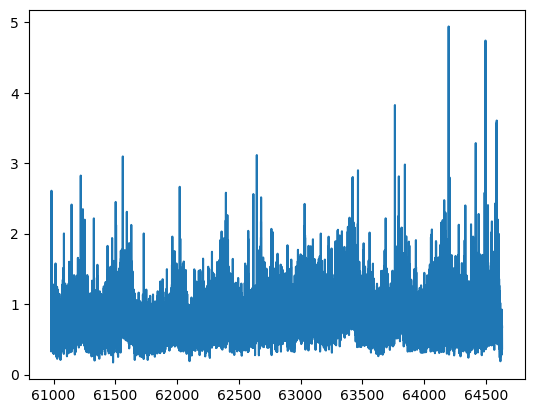

In [9]:
plt.plot(mjds, seeing)

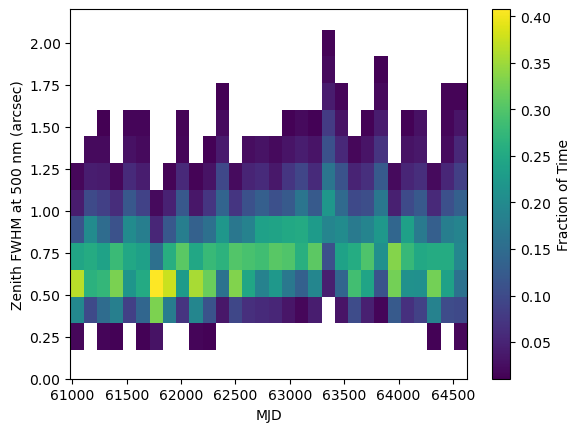

In [10]:
fig, ax = plt.subplots()
xbins = 30


h = ax.hist2d(mjds, seeing, bins=30, weights=seeing*0+1./seeing.size*xbins, cmin=0.01)
cb = plt.colorbar(h[3], ax=ax)
ax.set_ylabel('Zenith FWHM at 500 nm (arcsec)')
ax.set_xlabel('MJD')
ax.set_ylim([0,2.2])
cb.set_label('Fraction of Time')
fig.savefig('seeing_over_time.pdf')

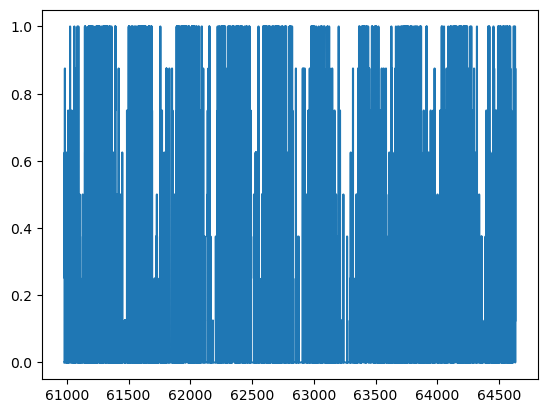

In [11]:
plt.plot(mjds, clouds)

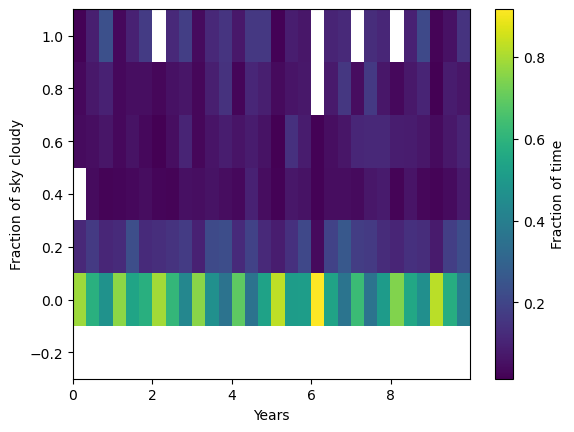

In [12]:
fig, ax = plt.subplots()
xbins = 30
h = ax.hist2d((mjds-np.min(mjds))/365.25, clouds,
              bins=[xbins, np.arange(-0.3, 1.2, .2)],
              weights=clouds*0+1./clouds.size*xbins, cmin=0.01)
cb = plt.colorbar(h[3], ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('Fraction of sky cloudy')
cb.set_label('Fraction of time')
fig.savefig('cloudy_over_time.pdf')

In [13]:
# What fraction of the time is cloudy?
np.where(clouds > 0.3)[0].size/clouds.size

0.26838356164383564

(60982.66, 60989.66)